## Association Rule Learning Homework

*Prepared by:*
**Eduardo F. Valdez**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

---
You may do this solo or submit as a group using the MCO/project groupings.


Submitted by: MCO1 5
- ABROGUEÑA, Alfhea
- JAVIER, Allysa
- LICUP, Priscilla
- MOTWANI, Hitika

## Requirements

Answer the following questions:

**Groceries Dataset**  
1. Calculate the association rules and find the `significant/interesting` items in this dataset. Feel free to use any threshold value. (10 pts)
    - group the items by member
    - group the items by month
2. What would you recommend to the owner of a grocery store given these association rules? (15 pts)
3. Is there any other grouping that could give us high confidence/interest? (10 pts)

**Another Dataset**  
1. Find another dataset that can be turned into an association rule learning problem. Ideally, more than 1000 transactions/records. This does not have to be grocery-related. Create a data dictionary. Show basic statistics (e.g mean, median, mode, non-null and null values etc.)(20 pts)
2. Similar to the grocery dataset, calculate the association rules and find the `significant/interesting` items. (10 pts)
3. What would you recommend given the association rules? (25 pts)
4. Any other learning?

Note:
 - You have to create a writeup on the code you've written. Submit the writeup as a PDF file. Make sure that the code is clean as well. Moroever, there is documentation/text cells in the notebook. (5 pts)
 - Cite references if there are any. If you will be using the code I've given, cite it. If you got help from your peers, cite it as well. (5 pts)
 - Submit the link for your copy of the Google Colaboratory notebook. **Make sure it's public**. You may use incognito to see if the link is accessible.

<hr>

## Grading Criteria

|Criteria|Points|
|---|---|
|Groceries Dataset Analysis|35|
|Another Dataset Analysis|55|
|Code Cleanliness|5|
|References|5|


## Preliminaries

### Import libraries

We will be using the `PyFIM` library to do association rule learning in this homework. If this is not already installed in your environment, you may use the either of the following commands in your command line:

```conda install -c conda-forge pyfim``` or
```pip install pyfim```

In [ ]:
!pip install pyfim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from fim import arules, apriori, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Prepare the dataset

We will be utilizing the <a href="https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset">Groceries dataset</a> from Kaggle.

#**Groceries**


In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/efvaldez1/data-repository/main/groceries.csv'
df = pd.read_csv(url)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Check the structure
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


##Grouped by **MEMBER**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Group items by 'Member_number'
membernumber = df.groupby('Member_number')['itemDescription'].apply(list).reset_index(name='items')

# Convert item lists to transaction format
te = TransactionEncoder()
te_ary = te.fit(membernumber['items']).transform(membernumber['items'])
member_df = pd.DataFrame(te_ary, columns=te.columns_)


# Identify frequent itemsets that appear in at least 10% of the transactions
frequent_itemsets = apriori(member_df, min_support=0.1, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.119548,(beef)
1,0.158799,(bottled beer)
2,0.213699,(bottled water)
3,0.135967,(brown bread)
4,0.126475,(butter)
5,0.165213,(canned beer)
6,0.100564,(chicken)
7,0.185480,(citrus fruit)
8,0.114931,(coffee)
9,0.120831,(curd)


The `frequent_itemsets` DataFrame contains itemsets that frequently occur together in the dataset, along with their support values. Here are some key results:

**Single Itemsets:**

- **Whole Milk** appears in 45.8% of the transactions.
- **Other Vegetables** appears in 37.7% of the transactions.
- **Rolls/Buns** appears in 35% of the transactions.

**Two Itemsets:**

- **Other Vegetables** and **Whole Milk** appear together in 19.1% of the transactions.
- **Rolls/Buns** and **Whole Milk** appear together in 17.9% of the transactions.
- **Soda** and **Whole Milk** appear together in 15.1% of the transactions.
- **Yogurt** and **Whole Milk** appear together in 15% of the transactions.


---

In [ ]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules.sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
19,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
12,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
6,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
22,(tropical fruit),(whole milk),0.233710,0.458184,0.116470,0.498353,1.087672,0.009388,1.080076,0.105189
16,(root vegetables),(whole milk),0.230631,0.458184,0.113135,0.490545,1.070630,0.007464,1.063522,0.085746
21,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
3,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772


**Results**

The `rules` DataFrame contains association rules that meet the specified confidence threshold, along with various metrics that help evaluate the strength and significance of each rule. Here are some key results:

**Single Antecedents:**

- **Yogurt** implies **Whole Milk** with 53.22% confidence.
- **Bottled Water** implies **Whole Milk** with 52.58% confidence.
- **Sausage** implies **Whole Milk** with 51.93% confidence.
- **Rolls/Buns** implies **Whole Milk** with 51.06% confidence.
- **Other Vegetables** implies **Whole Milk** with 50.82% confidence.


---

##Grouped by **MONTH**

In [ ]:
# Convert date column into datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and group items by month
df['month'] = df['Date'].dt.month
# month_grouped = df.groupby('month')['itemDescription'].apply(list).reset_index()
month_grouped = df.groupby(['month', 'Member_number'])['itemDescription'].apply(list).reset_index()

# One-hot Encode the Data
te = TransactionEncoder()
te_ary = te.fit(month_grouped['itemDescription']).transform(month_grouped['itemDescription'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# # Find Frequent Itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# # Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# # Display the association rules
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.052288,0.179350,0.010426,0.199405,1.111822,0.001049,1.025050,0.106125
1,(bottled water),(whole milk),0.070106,0.179350,0.011516,0.164262,0.915876,-0.001058,0.981947,-0.089896
2,(citrus fruit),(whole milk),0.061391,0.179350,0.010815,0.176172,0.982285,-0.000195,0.996143,-0.018852
3,(rolls/buns),(other vegetables),0.125661,0.139200,0.016729,0.133127,0.956371,-0.000763,0.992994,-0.049589
4,(other vegetables),(rolls/buns),0.139200,0.125661,0.016729,0.120179,0.956371,-0.000763,0.993769,-0.050329
5,(soda),(other vegetables),0.111345,0.139200,0.014550,0.130678,0.938777,-0.000949,0.990197,-0.068370
6,(other vegetables),(soda),0.139200,0.111345,0.014550,0.104528,0.938777,-0.000949,0.992387,-0.070426
7,(whole milk),(other vegetables),0.179350,0.139200,0.022331,0.124512,0.894481,-0.002634,0.983223,-0.125681
8,(other vegetables),(whole milk),0.139200,0.179350,0.022331,0.160425,0.894481,-0.002634,0.977459,-0.120525
9,(yogurt),(other vegetables),0.098739,0.139200,0.012761,0.129236,0.928416,-0.000984,0.988557,-0.078809


In [ ]:
frequent_itemsets

The `frequent_itemsets` DataFrame contains itemsets that frequently occur together in the dataset, along with their support values. Here are some key results:

**Single Itemsets:**

- **Whole Milk** appears in 17.9% of the transactions.
- **Other Vegetables** appears in 13.9% of the transactions.
- **Rolls/Buns** appears in 12.6% of the transactions.

**Two Itemsets:**

- **Other Vegetables** and **Whole Milk** appear together in 22.3% of the transactions.
- **Yogurt** and **Whole Milk** appear together in 17.4% of the transactions.
- **Other Vegetables** and **Rolls/Buns** appear together in 16.7% of the transactions.
- **Sausage** and **Whole Milk** appear together in 13% of the transactions.


---

In [ ]:
rules

**Results**

The `rules` DataFrame contains association rules that meet the specified confidence threshold, along with various metrics that help evaluate the strength and significance of each rule. Here are some key results:

**Single Antecedents:**

- **Bottled Beer** implies **Whole Milk** with 19.94% confidence.
- **Sausage** implies **Whole Milk** with 18.74% confidence.
- **Yogurt** implies **Whole Milk** with 17.65% confidence.
- **Citrus Fruit** implies **Whole Milk** with 17.62% confidence.
- **Bottled Water** implies **Whole Milk** with 16.43% confidence.


---

##Grouped by **Member and Date**

In [ ]:
df.itemDescription = df.itemDescription.transform(lambda x: [x])
member_date= df.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

te_md = TransactionEncoder()
te_ary_md = pd.DataFrame(te_md.fit(member_date).transform(member_date), columns=te_md.columns_)
te_ary_md.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(te_ary_md, min_support= 6/len(member_date), use_colnames=True, max_len = 2)

# Sort frequent_itemsets by support in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
156,0.157923,(whole milk)
97,0.122101,(other vegetables)
116,0.110005,(rolls/buns)
131,0.097106,(soda)
157,0.085879,(yogurt)
...,...,...
1570,0.000401,"(processed cheese, pork)"
871,0.000401,"(white bread, coffee)"
865,0.000401,"(coffee, sliced cheese)"
859,0.000401,"(coffee, pot plants)"


The `frequent_itemsets` DataFrame contains itemsets that frequently occur together in the dataset, along with their support values. Here are some key results:

**Single Itemsets:**

- **Whole Milk** appears in 15.8% of the transactions.
- **Other Vegetables** appears in 12.2% of the transactions.
- **Rolls/Buns** appears in 11% of the transactions.
- **Soda** appears in 9.7% of the transactions.
- **Yogurt** appears in 8.6% of the transactions.



---

In [ ]:
lift_freq_itemsets = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
lift_freq_itemsets.sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750
18,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,0.461695
181,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
152,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
86,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,0.428360
...,...,...,...,...,...,...,...,...,...,...
151,(soda),(softener),0.097106,0.002740,0.000401,0.004129,1.507025,0.000135,1.001395,0.372625
87,(whole milk),(artif. sweetener),0.157923,0.001938,0.000535,0.003386,1.746815,0.000229,1.001452,0.507708
139,(whole milk),(light bulbs),0.157923,0.001938,0.000468,0.002962,1.528463,0.000162,1.001027,0.410590
180,(whole milk),(canned fruit),0.157923,0.001403,0.000401,0.002539,1.809201,0.000179,1.001139,0.531151


**Results**

The `rules` DataFrame contains association rules that meet the specified confidence threshold, along with various metrics that help evaluate the strength and significance of each rule. Here are some key results:

**Single Antecedents:**

- **Brandy** implies **Whole Milk** with 34.21% confidence.
- **Softener** implies **Whole Milk** with 29.27% confidence.
- **Syrup** implies **Whole Milk** with 28.57% confidence.
- **Canned Fruit** implies **Whole Milk** with 28.57% confidence.
- **Artificial Sweetener** implies **Whole Milk** with 27.59% confidence.


---

###Data **Visualization**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/efvaldez1/data-repository/main/groceries.csv')
df.head()

# Check frequency for itemsets
item_counts = (
    df.groupby('itemDescription')['itemDescription']
    .count()
    .to_frame(name='Frequency')
    .reset_index()
    .sort_values(by='Frequency', ascending=False)
    .head(10)
)

print(item_counts)

      itemDescription  Frequency
164        whole milk       2502
102  other vegetables       1898
122        rolls/buns       1716
138              soda       1514
165            yogurt       1334
123   root vegetables       1071
156    tropical fruit       1032
12      bottled water        933
130           sausage        924
30       citrus fruit        812


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


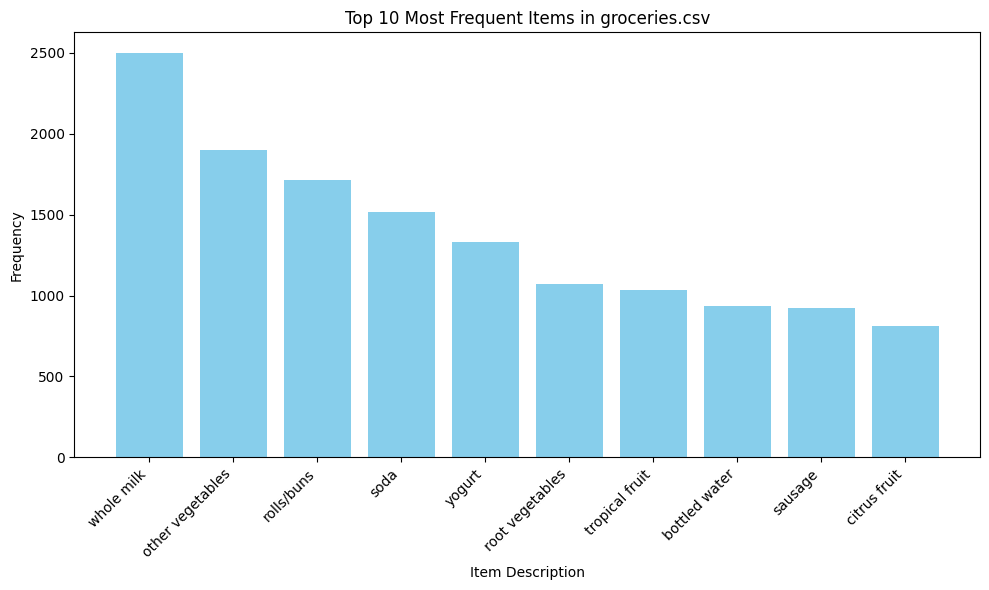

In [ ]:
#import matplotlib for graph
import matplotlib.pyplot as plt

#specifications
plt.figure(figsize=(10, 6))
plt.bar(item_counts['itemDescription'], item_counts['Frequency'], color='skyblue')
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items in groceries.csv')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#check frequency for members
item_counts = (
    df.groupby('Member_number')['Member_number']
    .count()
    .to_frame(name='Frequency')
    .reset_index()
    .sort_values(by='Frequency', ascending=False)
    .head(10)
)

print(item_counts)

      Member_number  Frequency
2120           3180         36
2665           3737         33
1994           3050         33
1026           2051         33
2838           3915         31
1388           2433         31
1575           2625         31
1234           2271         31
2798           3872         30
3774           4875         29


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Predict **Pet Adoption Status** Dataset

###Data Dictionary

**Dataset Description**

The Pet Adoption Dataset provides a comprehensive look into various factors that can influence the likelihood of a pet being adopted from a shelter. This dataset includes detailed information about pets available for adoption, covering various characteristics and attributes.

**Features**

1. **PetID**: Unique identifier for each pet.
2. **PetType**: Type of pet (e.g., Dog, Cat, Bird, Rabbit).
3. **Breed**: Specific breed of the pet.
4. **AgeMonths**: Age of the pet in months.
5. **Color**: Color of the pet.
6. **Size**: Size category of the pet (Small, Medium, Large).
7. **WeightKg**: Weight of the pet in kilograms.
8. **Vaccinated**: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
9. **HealthCondition**: Health condition of the pet (0 - Healthy, 1 - Medical condition).
10. **TimeInShelterDays**: Duration the pet has been in the shelter (days).
11. **AdoptionFee**: Adoption fee charged for the pet (in dollars).
12. **PreviousOwner**: Whether the pet had a previous owner (0 - No, 1 - Yes).
13. **AdoptionLikelihood**: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).


In [ ]:
#import dataset
df = pd.read_csv('https://raw.githubusercontent.com/hitikam/main/main/pet_adoption_data.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


###Basic Statistics
e.g mean, median, mode, non-null and null values etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#check for null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [ ]:
#non-null values
df.notnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PetID                 2007
PetType               2007
Breed                 2007
AgeMonths             2007
Color                 2007
Size                  2007
WeightKg              2007
Vaccinated            2007
HealthCondition       2007
TimeInShelterDays     2007
AdoptionFee           2007
PreviousOwner         2007
AdoptionLikelihood    2007
dtype: int64

In [ ]:
#mean, median, and mode
columns = ["AgeMonths", "WeightKg", "Vaccinated", "HealthCondition", "TimeInShelterDays", "AdoptionFee", "PreviousOwner", "AdoptionLikelihood"]

for i in columns:
  print(i)
  print("Mean: ", df[i].mean())
  print("Median: ", df[i].median())
  print("Mode: ", df[i].mode())
  print("-----")

AgeMonths
Mean:  92.27952167414051
Median:  94.0
Mode:  0    149
Name: AgeMonths, dtype: int64
-----
WeightKg
Mean:  15.705776425829484
Median:  15.925416197503
Mode:  0        1.018198
1        1.036774
2        1.046434
3        1.063340
4        1.084440
          ...    
2002    29.980752
2003    29.984569
2004    29.992497
2005    29.992795
2006    29.995628
Name: WeightKg, Length: 2007, dtype: float64
-----
Vaccinated
Mean:  0.7010463378176383
Median:  1.0
Mode:  0    1
Name: Vaccinated, dtype: int64
-----
HealthCondition
Mean:  0.1963129048330842
Median:  0.0
Mode:  0    0
Name: HealthCondition, dtype: int64
-----
TimeInShelterDays
Mean:  43.974090682610864
Median:  45.0
Mode:  0    15
Name: TimeInShelterDays, dtype: int64
-----
AdoptionFee
Mean:  249.14200298953662
Median:  242.0
Mode:  0    111
Name: AdoptionFee, dtype: int64
-----
PreviousOwner
Mean:  0.30194319880418535
Median:  0.0
Mode:  0    0
Name: PreviousOwner, dtype: int64
-----
AdoptionLikelihood
Mean:  0.32835077229

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Frequency Count of Categorical Columns
numerical_columns = ["PetID", "AgeMonths", "WeightKg", "TimeInShelterDays", "AdoptionFee"]
categorical_columns = ['PetType', 'Breed', 'Color', 'Size', 'Vaccinated', 'HealthCondition', 'PreviousOwner', 'AdoptionLikelihood']

categorical_df = df.drop(numerical_columns, axis=1)

for column in categorical_df.columns:
    print(categorical_df[column].value_counts())
    print("\n")

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64


Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64


Color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64


Size
Medium    714
Small     663
Large     630
Name: count, dtype: int64


Vaccinated
1    1407
0     600
Name: count, dtype: int64


HealthCondition
0    1613
1     394
Name: count, dtype: int64


PreviousOwner
0    1401
1     606
Name: count, dtype: int64


AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Encode categorical variables

In [ ]:
# Encode categorical variables
encoded_df = pd.get_dummies(categorical_df)       # perform one-hot encoding on the categorical variables
encoded_df = encoded_df.astype(bool)              # convert to boolean type (for optimal performance)
encoded_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Vaccinated,HealthCondition,PreviousOwner,AdoptionLikelihood,PetType_Bird,PetType_Cat,PetType_Dog,PetType_Rabbit,Breed_Golden Retriever,Breed_Labrador,...,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White,Size_Large,Size_Medium,Size_Small
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2003,True,True,False,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2004,True,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
2005,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,False


###Identify frequent itemsets

In [ ]:
# Apply the Apriori algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# identifies frequent itemsets that appear in at least 10% of the transactions
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.701046,(Vaccinated)
1,0.196313,(HealthCondition)
2,0.301943,(PreviousOwner)
3,0.328351,(AdoptionLikelihood)
4,0.242651,(PetType_Bird)
5,0.251619,(PetType_Cat)
6,0.260090,(PetType_Dog)
7,0.245640,(PetType_Rabbit)
8,0.242651,(Breed_Parakeet)
9,0.125561,(Breed_Persian)


The `frequent_itemsets` DataFrame contains itemsets that frequently occur together in the dataset, along with their support values. Here are some key results:

**Single Itemsets:**

- **Vaccinated** appears in 70.1% of the transactions.
- **Size_Medium** appears in 35.6% of the transactions.
- **AdoptionLikelihood** appears in 32.8% of the transactions.

**Two Itemsets:**

- **HealthCondition** and **Vaccinated** appear together in 14.2% of the transactions.
- **PreviousOwner** and **Vaccinated** appear together in 20.9% of the transactions.
- **AdoptionLikelihood** and **Vaccinated** appear together in 29.5% of the transactions.

**Three Itemsets:**

- **PetType_Bird**, **Breed_Parakeet**, and **Vaccinated** appear together in 17.1% of the transactions.
- **PetType_Rabbit**, **Breed_Rabbit**, and **Vaccinated** appear together in 16.8% of the transactions.


---



###Generate association rules


In [ ]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules.sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(Breed_Siamese),(PetType_Cat),0.126059,0.251619,0.126059,1.000000,3.974257,0.094340,inf,0.856328
9,(Breed_Parakeet),(PetType_Bird),0.242651,0.242651,0.242651,1.000000,4.121150,0.183771,inf,1.000000
23,"(PetType_Rabbit, Vaccinated)",(Breed_Rabbit),0.168411,0.245640,0.168411,1.000000,4.070994,0.127042,inf,0.907130
20,"(Vaccinated, PetType_Bird)",(Breed_Parakeet),0.170902,0.242651,0.170902,1.000000,4.121150,0.129432,inf,0.913462
18,"(Breed_Parakeet, Vaccinated)",(PetType_Bird),0.170902,0.242651,0.170902,1.000000,4.121150,0.129432,inf,0.913462
14,(Breed_Rabbit),(PetType_Rabbit),0.245640,0.245640,0.245640,1.000000,4.070994,0.185301,inf,1.000000
13,(PetType_Rabbit),(Breed_Rabbit),0.245640,0.245640,0.245640,1.000000,4.070994,0.185301,inf,1.000000
11,(Breed_Persian),(PetType_Cat),0.125561,0.251619,0.125561,1.000000,3.974257,0.093967,inf,0.855840
10,(PetType_Bird),(Breed_Parakeet),0.242651,0.242651,0.242651,1.000000,4.121150,0.183771,inf,1.000000
24,"(Vaccinated, Breed_Rabbit)",(PetType_Rabbit),0.168411,0.245640,0.168411,1.000000,4.070994,0.127042,inf,0.907130


**Results**

The `rules` DataFrame contains association rules that meet the specified confidence threshold, along with various metrics that help evaluate the strength and significance of each rule. Here are some key results:

**Single Antecedents:**

- **HealthCondition** implies **Vaccinated** with 72.34% confidence.
- **AdoptionLikelihood** implies **Vaccinated** with 89.83% confidence.
- **PetType_Bird** implies **Vaccinated** with 70.43% confidence.

**Two Antecedents:**

- **PetType_Dog** and **AdoptionLikelihood** together imply **Vaccinated** with 87.19% confidence.
- **Size_Medium** and **AdoptionLikelihood** together imply **Vaccinated** with 89.44% confidence.
- **Size_Medium** and **Vaccinated** together imply **AdoptionLikelihood** with 79.92% confidence.

**Three Antecedents:**

- **PetType_Bird**, **Breed_Parakeet**, and **Vaccinated** together have 70.43% confidence.
- **PetType_Rabbit**, **Breed_Rabbit**, and **Vaccinated** together have 100% confidence.


---



In [ ]:
# Filter rules by confidence
significant_rules = rules[(rules['confidence'] >= 0.7) & (rules['lift'] >= 1.2)]
significant_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(AdoptionLikelihood),(Vaccinated),0.328351,0.701046,0.294968,0.898331,1.281414,0.064779,2.940455,0.326975
9,(Breed_Parakeet),(PetType_Bird),0.242651,0.242651,0.242651,1.000000,4.121150,0.183771,inf,1.000000
10,(PetType_Bird),(Breed_Parakeet),0.242651,0.242651,0.242651,1.000000,4.121150,0.183771,inf,1.000000
11,(Breed_Persian),(PetType_Cat),0.125561,0.251619,0.125561,1.000000,3.974257,0.093967,inf,0.855840
12,(Breed_Siamese),(PetType_Cat),0.126059,0.251619,0.126059,1.000000,3.974257,0.094340,inf,0.856328
13,(PetType_Rabbit),(Breed_Rabbit),0.245640,0.245640,0.245640,1.000000,4.070994,0.185301,inf,1.000000
14,(Breed_Rabbit),(PetType_Rabbit),0.245640,0.245640,0.245640,1.000000,4.070994,0.185301,inf,1.000000
15,"(AdoptionLikelihood, PetType_Dog)",(Vaccinated),0.120578,0.701046,0.105132,0.871901,1.243714,0.020601,2.333767,0.222824
16,"(AdoptionLikelihood, Size_Medium)",(Vaccinated),0.221724,0.701046,0.198306,0.894382,1.275782,0.042867,2.830519,0.277751
17,"(Size_Medium, Vaccinated)",(AdoptionLikelihood),0.248132,0.328351,0.198306,0.799197,2.433973,0.116832,3.344813,0.783580


###Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


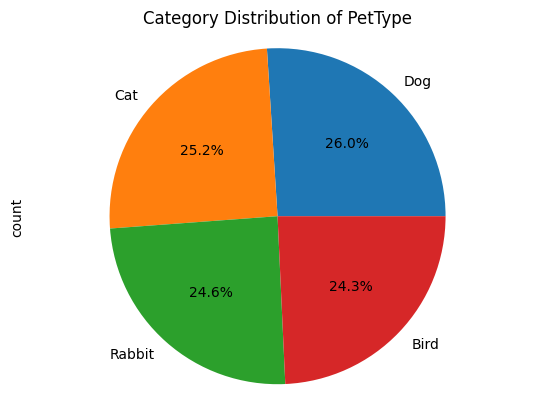

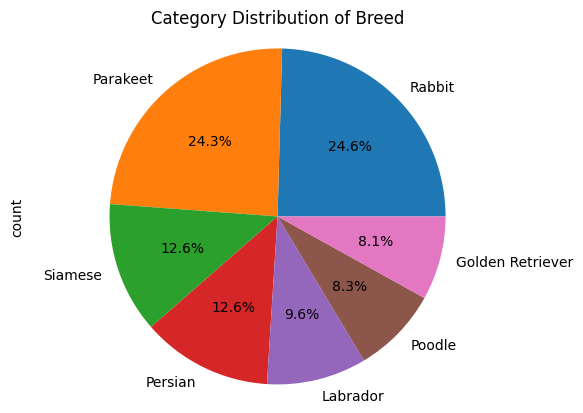

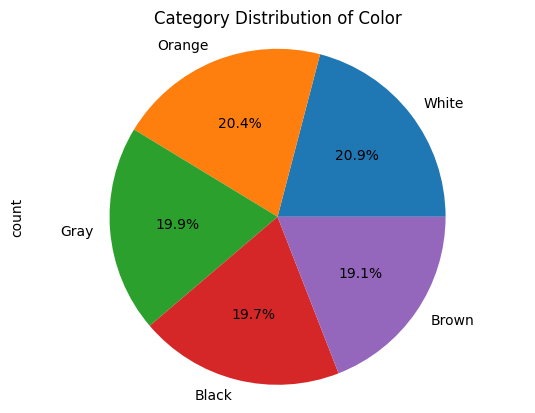

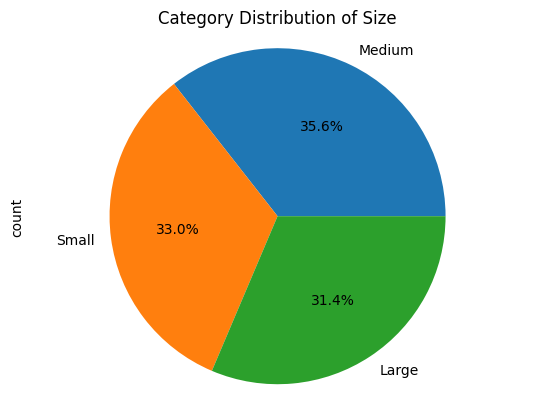

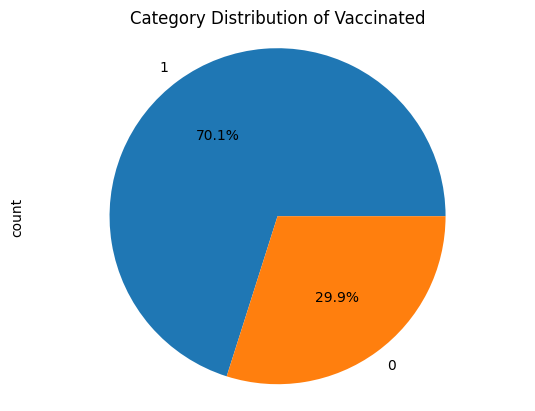

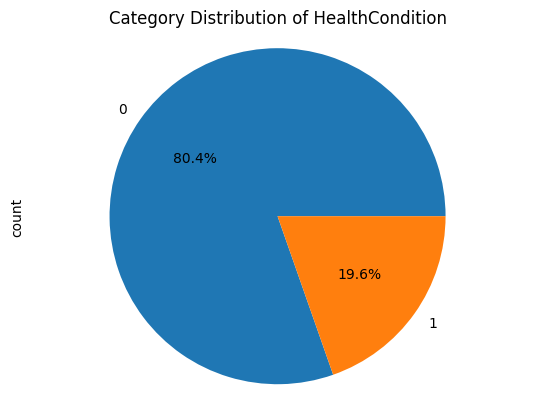

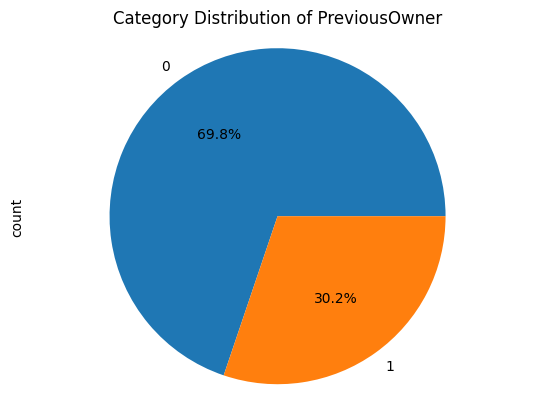

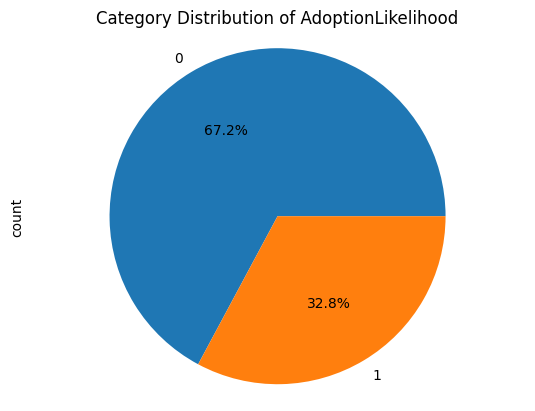

In [ ]:
# Pie Charts for Categorical Columns
import matplotlib.pyplot as plt

for column in categorical_df.columns:
  category_counts = categorical_df[column].value_counts()
  category_counts.plot(kind='pie', autopct='%1.1f%%')
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(f'Category Distribution of {column}')
  plt.show()

## Writeup/Analysis

Refer to the **Requirements section** for the guide questions.

## References

edureka! (2019, June 19). Apriori algorithm explained | Association Rule Mining | Finding frequent itemset | Edureka [Video]. YouTube. https://www.youtube.com/watch?v=guVvtZ7ZClw

Gupta, A. (2023, January 11). Implementing apriori algorithm in Python. GeeksforGeeks. https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/


## End
<sup>prepared by **Eduardo Valdez**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup>  <href>eduardo.valdez@dlsu.edu.ph</href></sup><br>